In [1]:
# conda install -c conda-forge pyldavis

In [2]:
# in terminal
# python -m spacy download en_core_web_sm

In [3]:
# !conda install gensim -y

In [4]:
import spacy
import pickle
from emoji import UNICODE_EMOJI
import pyLDAvis

In [5]:
df = pickle.load(open("Data/clean_df.pickle","rb"))
spaced_notes = pickle.load(open("Data/spaced_notes.pickle","rb"))
demoji_notes = pickle.load(open("Data/demoji_notes.pickle","rb"))
defined_notes = pickle.load(open("Data/defined_notes.pickle","rb"))

Using a smaller set of notes to practice preprocessing

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
import re
from sklearn.feature_extraction.text import TfidfVectorizer


In [7]:
import matplotlib.pyplot as plt

In [8]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join(feature_names[i] + ' ' + f'{topic[i]:9.2f}'
                        for i in topic.argsort()[:-no_top_words - 1:-1]))

# Topic Modeling

## spaced_notes
### generate document-term matrix

https://stackoverflow.com/questions/57333183/sk-learn-countvectorizer-keeping-emojis-as-words

from sklearn.feature_extraction.text import TfidfVectorizer
s= ['👋 Welcome', '👋 Welcome']

v = TfidfVectorizer(token_pattern=r'[^\s]+')
v.fit(s)
v.get_feature_names()

['welcome', '👋']


In [9]:
vectorizer = CountVectorizer(token_pattern=r'[^\s]+',stop_words='english',min_df=200)
dtm = vectorizer.fit_transform(spaced_notes)
dtm.shape

(286464, 443)

### LSA

In [10]:
# We have to convert `.toarray()` because the vectorizer returns a sparse matrix.
# For a big corpus, we would skip the dataframe and keep the output sparse.
dtm_lsa = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names())

In [11]:
dtm_lsa.columns

Index(['airbnb', 'amazon', 'april', 'ass', 'august', 'awesome', 'b', 'baby',
       'babysitting', 'balance',
       ...
       '🥟', '🥤', '🥦', '🥩', '🥪', '🥯', '🥰', '🥳', '🦄', '🧀'],
      dtype='object', length=443)

In [12]:
# # Latent Semantic Analysis (LSA) is just another name for Singular Value Decomposition (SVD) applied to Natural Language Processing (NLP)

lsa = TruncatedSVD(150)
doc_topic = lsa.fit(dtm[:100000])

sum(lsa.explained_variance_ratio_[0:20])

0.38946491634835056

In [37]:
with open('Models/lsa_spaced_100k.pickle', 'wb') as f:
    pickle.dump(doc_topic, f)

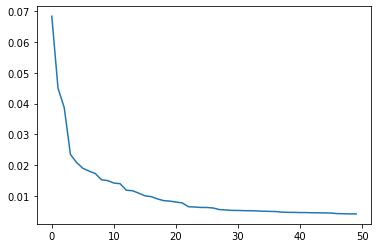

In [13]:
plt.plot(lsa.explained_variance_ratio_[0:50])

In [14]:
display_topics(lsa, vectorizer.get_feature_names(), 3)


Topic  0
️      0.78, ☕      0.60, ‍      0.11

Topic  1
🍕      1.00, ‍      0.01, 🍔      0.01

Topic  2
‍      0.65, 👨      0.42, 🏿      0.40

Topic  3
💸      0.85, 🏠      0.46, 🔌      0.13

Topic  4
🍔      1.00, 🍟      0.05, 🌮      0.03

Topic  5
food      1.00, chinese      0.02, ❤      0.01

Topic  6
☕      0.54, 🍳      0.27, 🏿      0.23

Topic  7
🌮      0.80, 🌯      0.56, ☕      0.11

Topic  8
🍣      1.00, ☕      0.03, 🍱      0.02

Topic  9
🌯      0.81, ☕      0.04, 🍣      0.04

Topic  10
🏈      0.82, 🏻      0.32, ☕      0.20

Topic  11
🏈      0.55, ❤      0.46, ️      0.19

Topic  12
🍆      0.65, 💦      0.47, 🔥      0.38

Topic  13
🎉      0.89, ❤      0.15, 🎂      0.11

Topic  14
🏻      0.62, ❤      0.50, 🤘      0.17

Topic  15
🏼      0.65, ❤      0.37, 🍆      0.35

Topic  16
🔥      0.44, 🏼      0.43, 🔌      0.30

Topic  17
rent      0.99, 🔥      0.05, july      0.04

Topic  18
🍺      0.34, ⚡      0.31, 🏼      0.23

Topic  19
🍺      0.85, 🏠      0.26, 🔥      0.25

Topic  20
🏠   

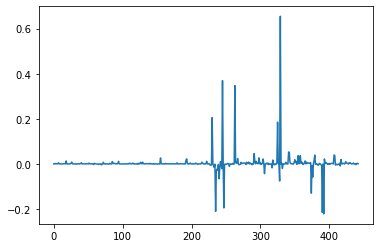

In [15]:
plt.plot(lsa.components_[15])

### NMF

In [16]:
nmf_model = NMF(20)
nmf_doc_topic = nmf_model.fit_transform(dtm[:100000])

In [38]:
with open('Models/nmf_spaced_100k.pickle', 'wb') as f:
    pickle.dump(nmf_doc_topic, f)

In [17]:
display_topics(nmf_model, vectorizer.get_feature_names(), 3)


Topic  0
️      7.44, ☕      7.30, ⚽      0.10

Topic  1
🍕      9.00, pizza      0.06, 🍗      0.04

Topic  2
👨      4.54, 🍳      4.45, ‍      4.45

Topic  3
💸      6.38, 🏠      4.46, 📱      0.68

Topic  4
🍔      7.41, 🍟      0.38, 🔙      0.15

Topic  5
food      7.29, chinese      0.14, 🥘      0.10

Topic  6
‍      7.10, ♂      4.31, ️      3.52

Topic  7
🌮      7.77, 🍹      1.08, 🍸      0.05

Topic  8
🍣      6.86, 🍱      0.12, 🍜      0.08

Topic  9
🌯      6.23, 🚙      0.09, 🏾      0.06

Topic  10
🏈      8.37, fantasy      1.04, football      0.30

Topic  11
❤      7.08, ️      3.23, ✈      0.27

Topic  12
🍆      7.68, 💦      1.50, 🍑      0.49

Topic  13
🎉      6.13, 🎂      0.73, 🍷      0.51

Topic  14
🏻      7.32, 🤘      1.66, 👍      0.46

Topic  15
🏼      8.11, 👍      0.60, 👌      0.55

Topic  16
🔥      6.35, 💦      3.49, 🔌      1.67

Topic  17
rent      6.03, july      0.26, june      0.21

Topic  18
⚡      4.63, 🔌      3.79, 💡      3.60

Topic  19
🍺      5.91, 🍻      1.13, 🍷      

## Gensim

In [18]:
from gensim import matutils, models
import scipy.sparse

/Users/allen/opt/anaconda3/envs/metis/lib/python3.8/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [19]:
tdm = dtm.transpose()

In [20]:
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [21]:
import gensim.corpora as corpora

In [22]:
id2word2 = corpora.Dictionary([[k for k,v in vectorizer.vocabulary_.items()]])

In [23]:
vectorizer.vocabulary_.items()

dict_items([('b', 6), ('food', 69), ('💇', 362), ('🎳', 314), ('🍵', 290), ('good', 85), ('⛽', 240), ('🏿', 332), ('💃', 358), ('🌮', 255), ('🥑', 427), ('know', 114), ('tickets', 197), ('🙏', 408), ('🏼', 329), ('uber', 207), ('got', 87), ('ya', 222), ('cash', 28), ('money', 135), ('🔥', 392), ('🍗', 272), ('🐔', 333), ('🎫', 312), ('🍿', 299), ('airbnb', 0), ('🌶', 260), ('🏻', 328), ('💯', 380), ('💦', 376), ('lunch', 127), ('\u200d', 227), ('♀', 232), ('🍸', 292), ('🥰', 439), ('🎂', 301), ('🎉', 306), ('🌯', 256), ('🍆', 263), ('🍺', 294), ('groceries', 89), ('🥳', 440), ('🎮', 313), ('💕', 367), ('s', 162), ('🤑', 414), ('🍔', 269), ('🍝', 276), ('🍕', 270), ('️', 247), ('🏌', 321), ('♂', 233), ('clothes', 39), ('❤', 245), ('👁', 340), ('😂', 396), ('i’m', 106), ('hot', 99), ('house', 101), ('💩', 378), ('🥤', 434), ('🐕', 334), ('tv', 204), ('phone', 146), ('💵', 383), ('💸', 384), ('📱', 388), ('hi', 97), ('☕', 230), ('⛳', 238), ('🏠', 325), ('🍴', 289), ('🍹', 293), ('march', 131), ('rent', 155), ('kids', 113), ('januar

In [24]:
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())

In [25]:
from datetime import datetime

In [26]:
print(datetime.now().strftime("%H:%M:%S"))
lda = models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=20, passes=50, workers=8)
lda.print_topics()
print(datetime.now().strftime("%H:%M:%S"))

19:34:57
19:47:23


In [40]:
with open('Models/lda_spaced_286k.pickle', 'wb') as f:
    pickle.dump(lda, f)

In [27]:
lda.print_topics()

[(0,
  '0.357*"❤" + 0.113*"️" + 0.082*"money" + 0.045*"💜" + 0.044*"trip" + 0.043*"😁" + 0.039*"insurance" + 0.032*"💛" + 0.030*"🏨" + 0.027*"costco"'),
 (1,
  '0.204*"🏠" + 0.204*"💸" + 0.149*"🎉" + 0.123*"😘" + 0.067*"🎂" + 0.032*"👰" + 0.026*"💙" + 0.024*"🎃" + 0.024*"wedding" + 0.022*"sorry"'),
 (2,
  '0.143*"🎁" + 0.080*"💵" + 0.073*"🍟" + 0.072*"🍗" + 0.055*"👕" + 0.053*"💅" + 0.049*"🎄" + 0.047*"🍞" + 0.036*"😋" + 0.033*"🎅"'),
 (3,
  '0.123*"love" + 0.086*"💃" + 0.075*"🥰" + 0.059*"🥳" + 0.055*"🎥" + 0.054*"🍸" + 0.053*"night" + 0.052*"bday" + 0.040*"🤪" + 0.039*"s"'),
 (4,
  '0.202*"stuff" + 0.168*"🍣" + 0.101*"💦" + 0.086*"🍆" + 0.068*"🍦" + 0.061*"wifi" + 0.043*"april" + 0.041*"extra" + 0.036*"supplies" + 0.035*"🍱"'),
 (5,
  '0.125*"🔥" + 0.095*"👶" + 0.087*"🍪" + 0.068*"day" + 0.059*"😊" + 0.046*"🧀" + 0.035*"drinks" + 0.031*"shirt" + 0.027*"🏖" + 0.027*"🤑"'),
 (6,
  '0.529*"🍕" + 0.068*"party" + 0.047*"🍩" + 0.046*"pay" + 0.042*"march" + 0.041*"venmo" + 0.038*"hotel" + 0.034*"🖤" + 0.034*"test" + 0.029*"da"'),
 (

In [28]:
from gensim.models import CoherenceModel

In [29]:
lda.log_perplexity(corpus)

-5.524694380412429

In [30]:
coherence_model_lda = CoherenceModel(model=lda, corpus=corpus, dictionary=id2word, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -15.402117200058104


In [31]:
import pyLDAvis

In [32]:
import pyLDAvis.gensim

In [33]:
id2word

{6: 'b',
 69: 'food',
 362: '💇',
 314: '🎳',
 290: '🍵',
 85: 'good',
 240: '⛽',
 332: '🏿',
 358: '💃',
 255: '🌮',
 427: '🥑',
 114: 'know',
 197: 'tickets',
 408: '🙏',
 329: '🏼',
 207: 'uber',
 87: 'got',
 222: 'ya',
 28: 'cash',
 135: 'money',
 392: '🔥',
 272: '🍗',
 333: '🐔',
 312: '🎫',
 299: '🍿',
 0: 'airbnb',
 260: '🌶',
 328: '🏻',
 380: '💯',
 376: '💦',
 127: 'lunch',
 227: '\u200d',
 232: '♀',
 292: '🍸',
 439: '🥰',
 301: '🎂',
 306: '🎉',
 256: '🌯',
 263: '🍆',
 294: '🍺',
 89: 'groceries',
 440: '🥳',
 313: '🎮',
 367: '💕',
 162: 's',
 414: '🤑',
 269: '🍔',
 276: '🍝',
 270: '🍕',
 247: '️',
 321: '🏌',
 233: '♂',
 39: 'clothes',
 245: '❤',
 340: '👁',
 396: '😂',
 106: 'i’m',
 99: 'hot',
 101: 'house',
 378: '💩',
 434: '🥤',
 334: '🐕',
 204: 'tv',
 146: 'phone',
 383: '💵',
 384: '💸',
 388: '📱',
 97: 'hi',
 230: '☕',
 238: '⛳',
 325: '🏠',
 289: '🍴',
 293: '🍹',
 131: 'march',
 155: 'rent',
 113: 'kids',
 107: 'january',
 129: 'make',
 81: 'gift',
 94: 'happy',
 18: 'birthday',
 19: 'bitch',
 83: 'g

In [34]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda, corpus, dictionary=id2word2)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
13    -0.250720 -0.095234       1        1  8.426198
2      0.050396 -0.066504       2        1  5.894001
1      0.182314  0.202907       3        1  5.824102
8      0.062093 -0.054551       4        1  5.679932
5      0.106739  0.014979       5        1  5.456136
18     0.062909 -0.030992       6        1  5.379640
7     -0.035006 -0.160643       7        1  5.173773
19    -0.168955  0.154405       8        1  5.002583
11    -0.254980  0.178447       9        1  4.959030
0     -0.231801  0.183188      10        1  4.743739
15    -0.067421 -0.141536      11        1  4.724213
17     0.052841 -0.087314      12        1  4.653268
9      0.166377  0.152438      13        1  4.630831
14     0.146862  0.175531      14        1  4.618249
3      0.046269 -0.080155      15        1  4.566953
16    -0.069165 -0.120892      16        1  4.547076
10     0.010559 -0.125792      17        1  4.195573
6      0.039036 -0.067644      18        1  4.006107
12     0.070629 -0.036202      19        1  3.834156
4      0.081024  0.005564      20        1  3.684441, topic_info=        Term         Freq        Total Category  logprob  loglift
270        🍕  6442.000000  6442.000000  Default  30.0000  30.0000
69      food  6685.000000  6685.000000  Default  29.0000  29.0000
245        ❤  5153.000000  5153.000000  Default  28.0000  28.0000
328        🏻  4663.000000  4663.000000  Default  27.0000  27.0000
247        ️  6817.000000  6817.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
149     plus     0.058852   260.152649  Topic20 -12.1572  -5.0930
150    poker     0.058852   230.777359  Topic20 -12.1572  -4.9731
151     pool     0.058852   226.486252  Topic20 -12.1572  -4.9544
152  present     0.058852   203.944290  Topic20 -12.1572  -4.8495
153   raffle     0.058852   276.281891  Topic20 -12.1572  -5.1531

[748 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         5  0.995779  airbnb
1         4  0.995813  amazon
2        20  0.997864   april
3        11  0.998666     ass
4         6  0.996247  august
...     ...       ...     ...
438       6  0.996084       🥯
439      15  0.999352       🥰
440      15  0.998305       🥳
441      13  0.996137       🦄
442       5  0.999331       🧀

[492 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 3, 2, 9, 6, 19, 8, 20, 12, 1, 16, 18, 10, 15, 4, 17, 11, 7, 13, 5])

In [41]:
with open('Models/ldavis_spaced_286k.pickle', 'wb') as f:
    pickle.dump(LDAvis_prepared, f)